In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# import csv file
df = pd.read_csv('./data/2012-04-25_to_2024-01-06_KA_bike_data.csv')

# change date col to datetime
df['date'] = pd.to_datetime(df['date'])
# set index as timestamp_CET but keep col
df.set_index('date', inplace=True, drop=False)
# rename date to timestamp_CET
df.rename(columns={'date': 'timestamp_CET'}, inplace=True)

print(df.info())
print(df.columns)
df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4261 entries, 2012-04-25 to 2024-01-06
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp_CET   4261 non-null   datetime64[ns]
 1   bike_count      4261 non-null   int64         
 2   temperature     4261 non-null   float64       
 3   humidity        4261 non-null   float64       
 4   windspeed       4261 non-null   float64       
 5   wind_direction  4261 non-null   float64       
 6   visibility      4261 non-null   float64       
 7   precipitation   4261 non-null   float64       
 8   sun             4261 non-null   int64         
 9   windspeed_max   4261 non-null   float64       
 10  precip_indic    4258 non-null   float64       
 11  precip_type     4076 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 432.8 KB
None
Index(['timestamp_CET', 'bike_count', 'temperature', 'humidity', 'winds

,timestamp_CET,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
date,,,,,,,,,,,,
2024-01-02,2024-01-02,1631,9.245833,83.916667,10.062500,218.333333,23492.916667,23.3,0,22.0,1.0,6.0
2024-01-03,2024-01-03,2553,10.466667,77.250000,9.245833,223.333333,57993.750000,11.5,24,18.8,1.0,6.0
2024-01-04,2024-01-04,3188,8.545833,78.041667,7.054167,218.333333,44335.000000,0.3,154,18.1,1.0,6.0
2024-01-05,2024-01-05,3754,6.145833,86.333333,2.383333,186.666667,45195.416667,0.0,41,7.4,0.0,0.0
2024-01-06,2024-01-06,1300,5.237500,89.666667,3.104167,238.750000,29155.000000,2.0,0,6.6,0.0,0.0


In [39]:
# resample df to daily
df_daily = df.resample('D').mean()
display(df_daily.loc['2018-04-14':'2018-04-17'])
# interpolate missing values
df_daily.interpolate(method='linear', inplace=True)
display(df_daily.loc['2018-04-14':'2018-04-17'])
# set index freq to daily
df_daily.index.freq = 'D'

,timestamp_CET,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
date,,,,,,,,,,,,
2018-04-14,2018-04-14,5080.0,13.633333,64.8,1.74,182.0,40034.0,0.0,610.0,5.7,0.0,0.0
2018-04-15,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-16,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-17,2018-04-17,7242.0,20.580000,47.7,1.95,107.0,41529.0,0.0,474.0,5.0,0.0,0.0


,timestamp_CET,bike_count,temperature,humidity,windspeed,wind_direction,visibility,precipitation,sun,windspeed_max,precip_indic,precip_type
date,,,,,,,,,,,,
2018-04-14,2018-04-14,5080.000000,13.633333,64.8,1.74,182.0,40034.000000,0.0,610.000000,5.700000,0.0,0.0
2018-04-15,2018-04-15,5800.666667,15.948889,59.1,1.81,157.0,40532.333333,0.0,564.666667,5.466667,0.0,0.0
2018-04-16,2018-04-16,6521.333333,18.264444,53.4,1.88,132.0,41030.666667,0.0,519.333333,5.233333,0.0,0.0
2018-04-17,2018-04-17,7242.000000,20.580000,47.7,1.95,107.0,41529.000000,0.0,474.000000,5.000000,0.0,0.0


In [48]:
y = df_daily['bike_count']
display(y)

date
2012-04-25    4593.0
2012-04-26    5849.0
2012-04-27    5846.0
2012-04-28    4261.0
2012-04-29    1901.0
               ...  
2024-01-02    1631.0
2024-01-03    2553.0
2024-01-04    3188.0
2024-01-05    3754.0
2024-01-06    1300.0
Freq: D, Name: bike_count, Length: 4274, dtype: float64

In [49]:
from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA


# step 2: specifying forecasting horizon
fh = [1, 2, 3]
# step 3: specifying the forecasting algorithm
forecaster = ARIMA()
# step 4: fitting the forecaster
forecaster.fit(y, fh=[1, 2, 3])
# step 5: querying predictions
y_pred = forecaster.predict()

# for probabilistic forecasting:
# call a probabilistic forecasting method after or instead of step 5
y_pred_int = forecaster.predict_interval(coverage=0.9)

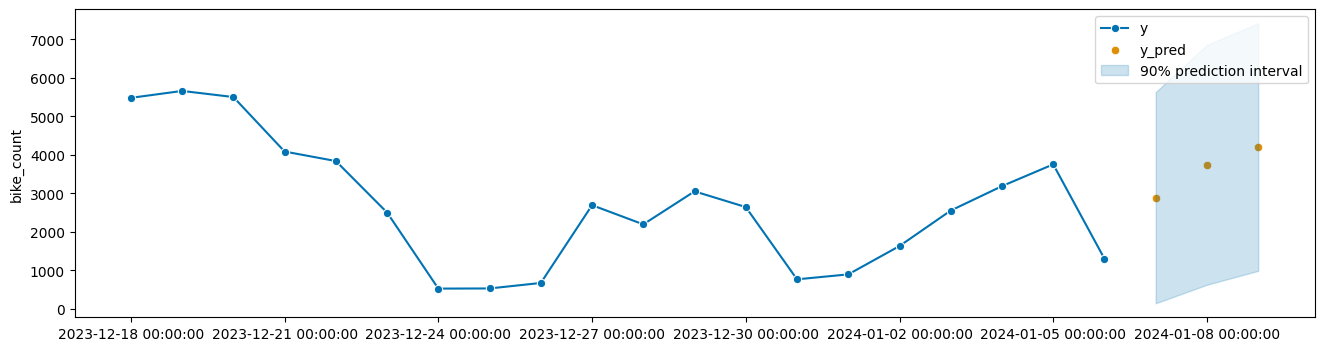

In [54]:
from sktime.utils import plotting
fig, ax = plotting.plot_series(y.tail(20), y_pred, labels=["y", "y_pred"], pred_interval=y_pred_int)

In [55]:
import numpy as np

# from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster

# until fit, identical with the simple workflow
# y = load_airline()

fh = np.arange(1, 13)

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y, fh=fh)

# predictions
y_pred = forecaster.predict()

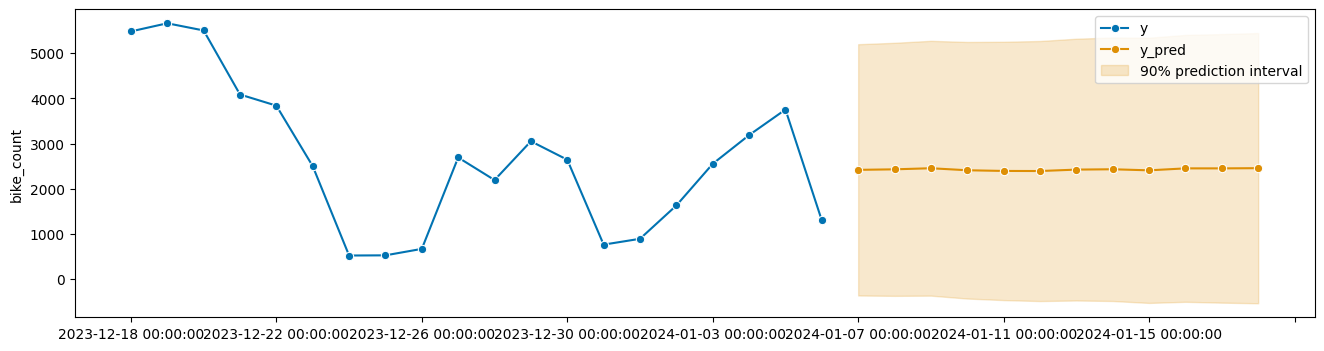

In [58]:
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)

fig, ax = plotting.plot_series(
    y.tail(20), y_pred, labels=["y", "y_pred"], pred_interval=y_pred_ints
)

ax.legend()
plt.show()

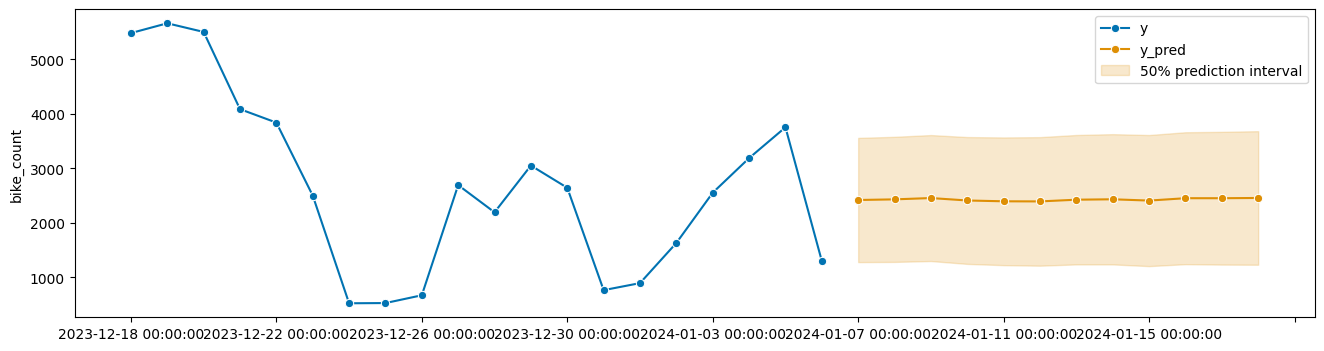

In [60]:
coverage = [0.5, 0.9, 0.95]
y_pred_ints = forecaster.predict_interval(coverage=coverage)

fig, ax = plotting.plot_series(
    y.tail(20), y_pred, labels=["y", "y_pred"], pred_interval=y_pred_ints
)

ax.legend()
plt.show()

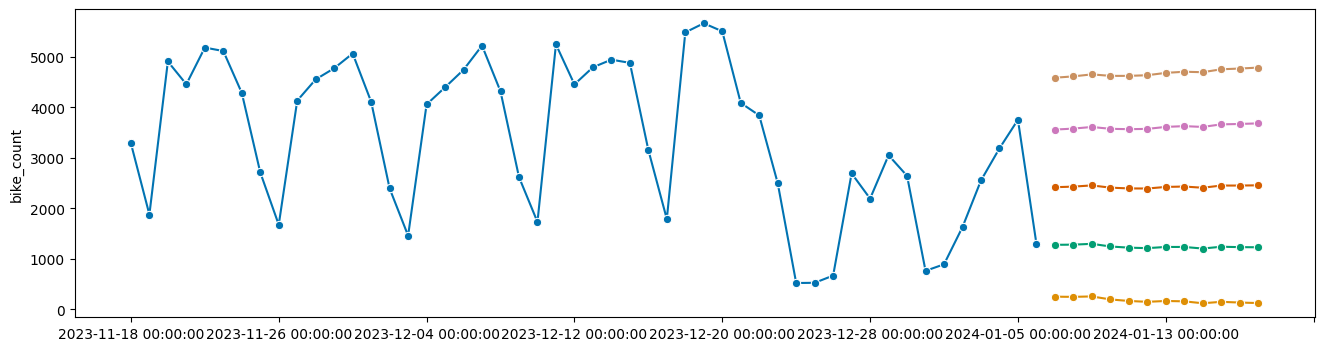

In [61]:
alpha = [0.1, 0.25, 0.5, 0.75, 0.9]
y_pred_quantiles = forecaster.predict_quantiles(alpha=alpha)

columns = [y_pred_quantiles[i] for i in y_pred_quantiles.columns]
fig, ax = plotting.plot_series(y[-50:], *columns)